In [ ]:
from tensorflow import keras # Tensor algebra backend with Keras API
from keras.layers import Dense, TimeDistributed, GRU, LSTM
from keras import Input, Model
import numpy as np
#import re
#from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd
# from keras.utils import multi_gpu_model # Use this for multiple GPUs
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure

!pip install -q keras-tcn --no-dependencies
from tcn import TCN, tcn_full_summary

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
temp_x = np.load('/content/gdrive/MyDrive/ML for NAVY/db1150_LE_x_test.npy')
temp_y = np.load('/content/gdrive/MyDrive/ML for NAVY/db1150_y_test.npy')

print(temp_x.shape)
print(temp_y.shape)

(1127, 25, 1)
(1127, 25, 1)


In [ ]:
x = temp_x
y = temp_y
x_shape = x.shape
y_shape = y.shape
print(x_shape,y_shape)

(1127, 25, 1) (1127, 25, 1)


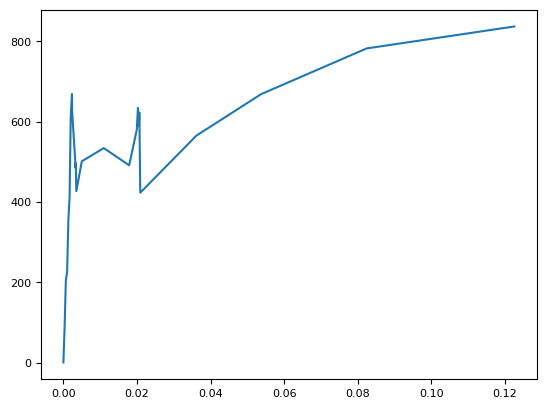

In [ ]:
# plot sample curve
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
plt.rcParams.update({'font.size': 8})#, 'font.weight' : 'bold'})
x_plot= x[1000].reshape(25,1)
y_plot= y[1000].reshape(25,1)
plt.plot(x_plot, y_plot)
plt.show()

In [ ]:
#empty inputs
y_train = y[:1000,:,:]
y_train_shape = y_train.shape
x_train = x[:1000,:,:]
x_train_shape = x_train.shape
print(x_train_shape,y_train_shape)

y_test = y[1000:1120,:,:]
y_test_shape = y_test.shape
x_test = x[1000:1120,:,:]
x_test_shape = x_test.shape
print(x_test_shape,y_test_shape)


(1000, 25, 1) (1000, 25, 1)
(120, 25, 1) (120, 25, 1)


In [ ]:
NNmodel = 'TCN'

batch_size, timesteps, input_dim = 20, 25, 1
i=Input(batch_shape=(batch_size, timesteps, input_dim))

if NNmodel == "GRU":
    o=GRU(490, return_sequences=True, activation = 'relu', dropout=0.0, recurrent_dropout=0.0)(i)
    o=GRU(490, return_sequences=True, activation = 'relu', dropout=0.0, recurrent_dropout=0.0)(o)
    o=GRU(490, return_sequences=True, activation = 'relu', dropout=0.0, recurrent_dropout=0.0)(o)
    o = TimeDistributed(Dense(3))(o)
    m = Model(inputs=[i], outputs=[o])
elif NNmodel == "LSTM":
    o=LSTM(20, return_sequences=True, activation = 'relu', dropout=0.0, recurrent_dropout=0.0)(i)
    o=LSTM(20, return_sequences=True, activation = 'relu', dropout=0.0, recurrent_dropout=0.0)(o)
    o=LSTM(20, return_sequences=True, activation = 'relu', dropout=0.0, recurrent_dropout=0.0)(o)
    o = TimeDistributed(Dense(3))(o)
    m = Model(inputs=[i], outputs=[o])
elif NNmodel == "TCN":
    o = TCN(nb_filters=64, kernel_size=7, nb_stacks=1, dilations=(1, 2, 4, 8, 16), dropout_rate=0.0, kernel_initializer='glorot_uniform',
            padding='causal', activation='relu', return_sequences=True, use_skip_connections=True, use_batch_norm=False, use_layer_norm=False)(i)
    o = TCN(nb_filters=128, kernel_size=4, nb_stacks=1, dilations=(1, 2, 4, 8, 16, 32), dropout_rate=0.0, kernel_initializer='glorot_uniform',
            padding='causal', activation='relu', return_sequences=True, use_skip_connections=True, use_batch_norm=False, use_layer_norm=False)(o)
    o = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=(1, 2, 4, 8, 16, 32, 64), dropout_rate=0.0, kernel_initializer='glorot_uniform',
            padding='causal', activation='relu', return_sequences=True, use_skip_connections=True, use_batch_norm=False, use_layer_norm=False)(o)
    o = TimeDistributed(Dense(2))(o)
    m = Model(inputs=[i], outputs=[o])


In [ ]:
import tensorflow

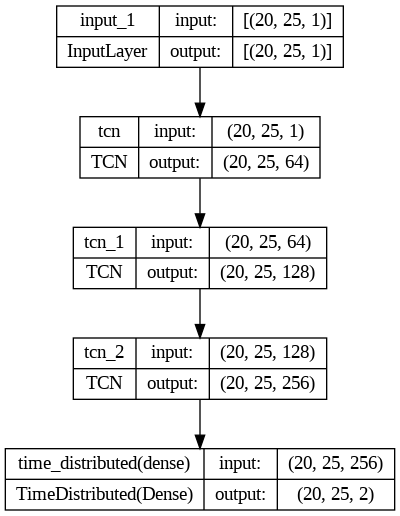

In [ ]:
tensorflow.keras.utils.plot_model(m, to_file='TCN architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
m.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse','accuracy'])
m.summary()
history = m.fit(x_train, y_train, epochs=15, validation_split=0.1, batch_size=batch_size, shuffle=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(20, 25, 1)]             0         
                                                                 
 tcn (TCN)                   (20, 25, 64)              259264    
                                                                 
 tcn_1 (TCN)                 (20, 25, 128)             763520    
                                                                 
 tcn_2 (TCN)                 (20, 25, 256)             1806080   
                                                                 
 time_distributed (TimeDist  (20, 25, 2)               514       
 ributed)                                                        
                                                                 
Total params: 2829378 (10.79 MB)
Trainable params: 2829378 (10.79 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

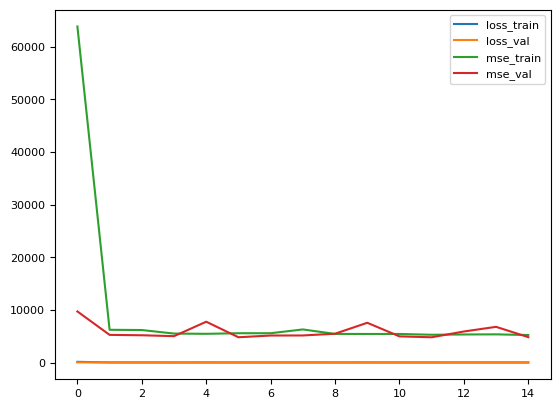

In [ ]:
# plot history

plt.plot(history.history['loss'], label='loss_train')
plt.plot(history.history['val_loss'], label='loss_val')
plt.plot(history.history['mse'], label='mse_train')
plt.plot(history.history['val_mse'], label='mse_val')
plt.legend()
plt.show()

In [ ]:
batch_size, timesteps, input_dim = 20, 25, 1
loss,mse,acc= m.evaluate(x=x_test, y=y_test, batch_size=batch_size)
print(loss)

6/6 [==============================] - 0s 12ms/step - loss: 57.6479 - mse: 5069.0195 - accuracy: 0.0000e+00
57.64793395996094


In [ ]:
y_test_pred = m.predict(x_test, batch_size=batch_size)

6/6 [==============================] - 1s 9ms/step


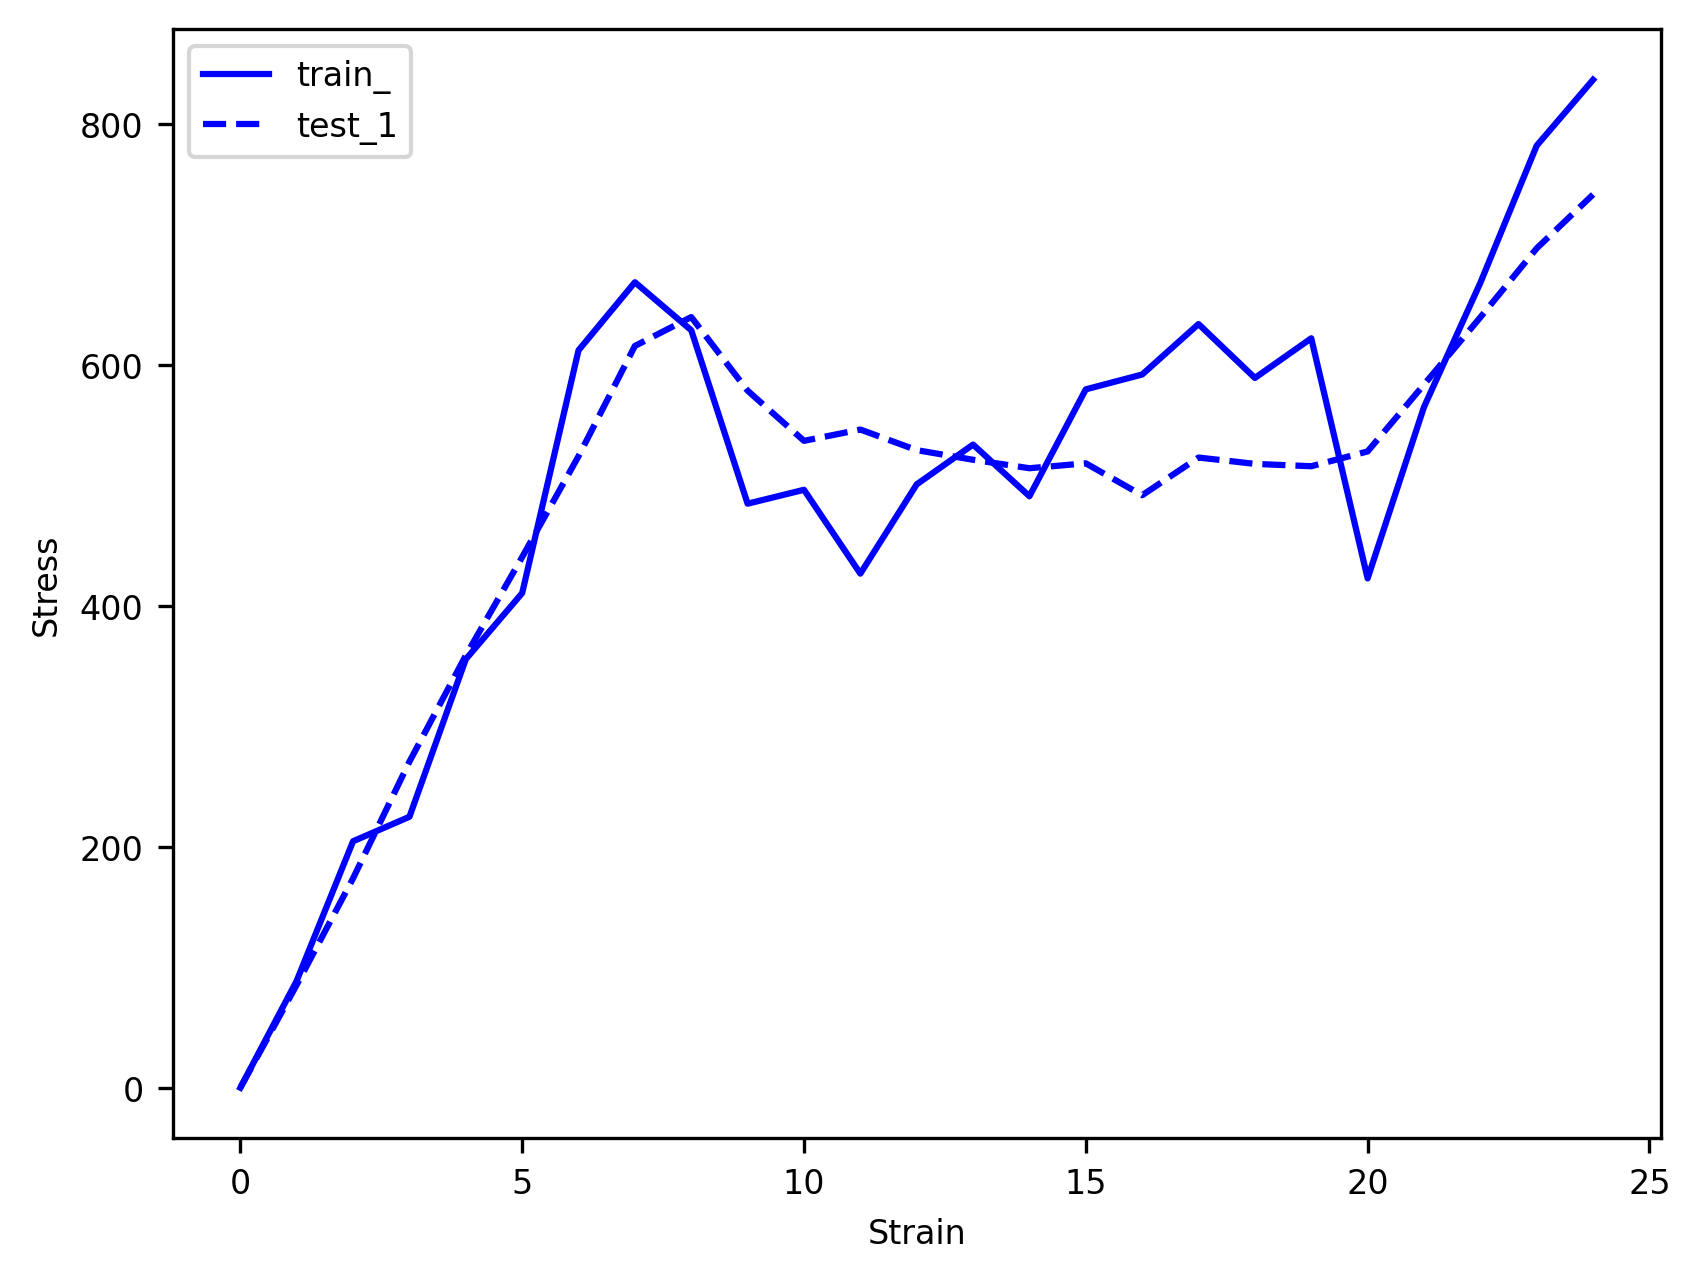

In [ ]:
data_point_1 = 0
y_test_plot = y_test
y_test_pred_plot = y_test_pred

from matplotlib.pyplot import figure
figure(dpi=300)
plt.plot(y_test_plot[data_point_1,:,0], label='train_',color='blue', linestyle='-')
plt.plot(y_test_pred_plot[data_point_1,:,0], label='test_1',color='blue', linestyle='dashed')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_iters = 2000
rand_curve = np.sort(np.random.exponential(size=num_iters))[::-1]
noise  = np.random.normal(0, 0.2, num_iters)

index = 0
for noise_value in  np.nditer(noise):
    noise[index] = noise_value - index
    index = index + 1

signal = rand_curve + noise
noisy_curve = signal[signal > 0]
plt.plot(noisy_curve, c='r', label='random curve')